/var/folders/hg/n17fww195g9887twwb23k9k40000gn/T/ipykernel_13875/2632057571.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection="3d")


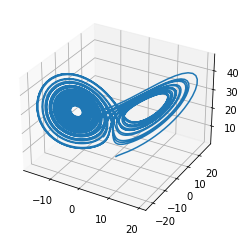

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 40.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Fucntion needs to be given state vector (x,y,z) as an
# array followed by values for sigma, rho and beta respectively

def lorenz_sys(x, y, z, sigma, rho, beta):
    #x, y, z = state 
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x*y - beta * z
    return dx, dy, dz

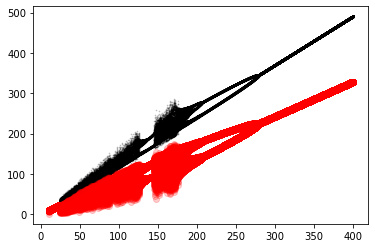

In [32]:
# Plotting extrema of varying R against z(t) with constant 
# values of sigma and beta

# Inital Conditions and Step Sizes
dr = 0.1                        # parameter step-size
rho = np.arange(10, 400, dr)     # range of the parameters
sigma = 10                      # sigma constant 
beta = 8/3                      # beta constant
dt = 0.001                      # time step-size
t = np.arange(0, 10, dt)        # time range

# Array to store solutions 
x, y, z = np.empty(len(t) + 1), np.empty(len(t) + 1), np.empty(len(t) + 1)

x[0], y[0], z[0] = (1,1,1)

# Array to store max and min values for bifurcations
r_max, z_max = [], []
r_min, z_min = [], []

# Nested loop to calculate approximate solutions to the equations
# with varying values for rho as defined by the above parameters
# and saving the max and min values of these parameters to plot 
# bifurcations of R over z(t) 
for R in rho:
    #print('loop running')
    # loop for appoximate solutions
    for i in range(len(t)):
        dx, dy, dz  = lorenz_sys(x[i], y[i], z[i], sigma, R, beta)
        x[i +1] = x[i] + (dx*dt)
        y[i +1] = y[i] + (dy*dt)
        z[i +1] = z[i] + (dz*dt)
    # loop to save maxima and minima
    for i in range(1, len(z) -1):
        if z[i - 1] < z[i] and z[i] > z[i+1]:
            r_max.append(R)
            z_max.append(z[i])
        elif z[i -1] > z[i] and z[i] < z[i+1]:
            r_min.append(R)
            z_min.append(z[i])
    # using final vals from completed run as initial conditions for 
    # the next loop 
    x[0], y[0], z[0] = x[i], y[i], z[i]

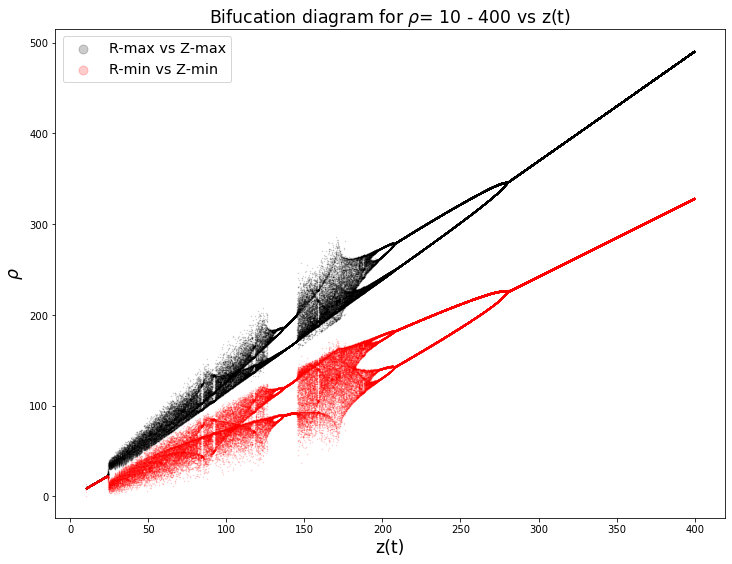

In [65]:
# Plotting the Bifurcation Diagram

plt.figure(figsize=(12,9))
plt.scatter(r_max, z_max, color="black", s=0.2, alpha=0.2, label='R-max vs Z-max')
plt.scatter(r_min, z_min, color="red", s=0.2, alpha=0.2, label='R-min vs Z-min')
plt.legend(markerscale=20, fontsize = 'x-large')
plt.title('Bifucation diagram for ' r'$\rho$' '= 10 - 400 vs z(t)', fontsize = 'xx-large')
plt.xlabel('z(t)', fontsize = 'xx-large')
plt.ylabel(r'$\rho$', fontsize = 'xx-large')
plt.savefig('images/fig3', dpi=300)
#plt.show()